In [3]:
%pip install opencv-python-headless
%pip install numpy pillow matplotlib

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
    --------------------------------------- 0.8/38.9 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.9 MB 4.1 MB/s eta 0:00:10
   --- ------------------------------------ 3.1/38.9 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/38.9 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.9 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/38.9 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.9 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.9 MB 5.5 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/38.9 MB 5.4 MB/s eta 0:00:06
   ------------ --------------------------- 11.8/38.9 MB 5.5 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.9 MB 5.3 MB/s eta 0:00:05
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


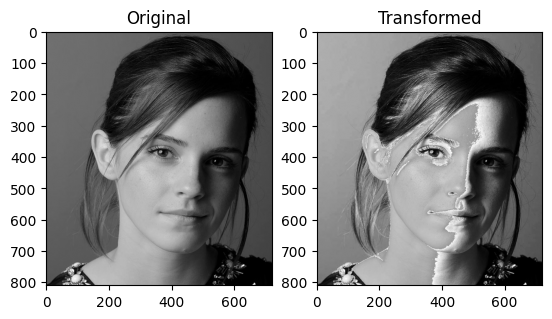

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\emma.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")


# Create lookup table (LUT) for intensity mapping
LUT = np.zeros(256, dtype=np.uint8)

for r in range(256):
    if r < 50:
        s = r
    elif r < 100:
        s = 2 * (r - 50) + 50   # slope 2 between (50,50) and (100,150)
    elif r < 150:
        s = (255 - 150) / (150 - 100) * (r - 100) + 150  # slope 2.1 approx
    else:
        s = (255 - 150) / (255 - 150) * (r - 150) + 150  # slope 1
    
    LUT[r] = np.clip(s, 0, 255)

# Apply transformation using LUT
transformed = cv2.LUT(img, LUT)

# Display results
plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(transformed, cmap="gray"), plt.title("Transformed")
plt.show()
